In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

from scipy import stats

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor


In [5]:
model_vars_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\model_vars_data.csv',index_col=0)

test_vars_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\test_vars_data.csv',index_col=0)

price_train = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\y_train.csv',index_col=0)

price_test = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\y_test.csv',index_col=0)

In [7]:
pd.set_option('display.max_columns', None)

model_vars_data.head(3)

,Neighborhood_Crawfor,YearRemodAdd,Neighborhood_Greens,GarageType_No,ExterCond,Neighborhood_SWISU,Exterior1st_PreCast,YearBuilt,Exterior1st_HdBoard,Neighborhood_SawyerW,OverallQual,GarageQual,GarageType_Detchd,Exterior1st_WdShing,Foundation_Stone,log_MasVnrArea,HouseStyle_2.5Unf,SaleCondition_Alloca,Exterior1st_BrkComm,LotShape,HeatingQC,CentralAir_Y,YrSold,Alley_Pave,Foundation_PConc,BldgType_Twnhs,Condition2_RRAe,Condition1_RRAe,TotRmsAbvGrd,RoofStyle_Hip,log_LotArea,log_BsmtFinSF1,Neighborhood_Edwards,SaleCondition_AdjLand,Exterior1st_MetalSd,Heating_GasW,log_WoodDeckSF,GarageCars,Exterior1st_AsphShn,Exterior2nd_AsphShn,Exterior2nd_Wd Sdng,Condition2_RRAn,GarageType_Attchd,MasVnrType_Stone,has_pool,BsmtFinType1,SaleCondition_Normal,MSZoning_I (all),Exterior1st_ImStucc,log_OpenPorchSF,Heating_Wall,LotConfig_CulDSac,yeo_TotalBsmtSF,Electrical_FuseP,Fireplaces,Exterior2nd_PreCast,yeo_GarageArea,Neighborhood_BrDale,Neighborhood_Gilbert,MSZoning_FV,LandContour_Low,Foundation_Wood,HouseStyle_1.5Unf,log_first_FlrSF,GarageCond,Fence_GdWo,Exterior2nd_CBlock,Foundation_CBlock,FireplaceQu,LandSlope,FullBath,Neighborhood_StoneBr,Exterior1st_Wd Sdng,Fence_MnPrv,Exterior2nd_CmentBd,Condition2_RRNn,Neighborhood_BrkSide,Condition2_Norm,HouseStyle_2.5Fin,Street_Pave,Utilities_NoSewr,PavedDrive_Y,KitchenQual,RoofStyle_Gable,Exterior1st_CBlock,Fence_MnWw,Neighborhood_ClearCr,Neighborhood_Sawyer,HouseStyle_2Story,Heating_GasA,GarageFinish_RFn,Condition1_Feedr,Condition1_PosA,Exterior1st_CemntBd,Neighborhood_NAmes,Exterior1st_BrkFace,Exterior2nd_Stucco,Foundation_Slab,Condition1_RRNn,SalePrice,BsmtExposure,MSZoning_RM,Condition1_RRNe,EnclosedPorch,BsmtHalfBath,Neighborhood_Blueste,BsmtFinType2,Electrical_SBrkr,Condition2_Feedr,LotConfig_FR3,MoSold,GarageType_Basment,Neighborhood_MeadowV,BsmtFullBath,Exterior2nd_BrkFace,Exterior2nd_MetalSd,Neighborhood_NoRidge,MSZoning_C (all),Condition2_PosA,Exterior2nd_Wd Shng,Alley_None,Condition1_RRAn,RoofMatl_Membran,Exterior2nd_Plywood,LandContour_Lvl,Electrical_Mixed,Electrical_FuseF,Neighborhood_Mitchel,Exterior2nd_ImStucc,GarageType_CarPort,LotConfig_Inside,Neighborhood_NWAmes,HouseStyle_1Story,HouseStyle_SLvl,Exterior1st_Stucco,Neighborhood_Landmrk,Condition1_Norm,Exterior1st_Plywood,RoofStyle_Gambrel,MasVnrType_None,BedroomAbvGr,LotConfig_FR2,Exterior2nd_Stone,GarageFinish_Unf,ExterQual,OverallCond,MSZoning_RH,Neighborhood_NridgHt,MasVnrType_BrkFace,MSSubClass,RoofMatl_Metal,BldgType_2fmCon,SaleCondition_Partial,Fence_No,Neighborhood_CollgCr,RoofStyle_Mansard,bc_GrLivArea,RoofMatl_Roll,BsmtFinSF2,Neighborhood_Veenker,Exterior2nd_HdBoard,Neighborhood_GrnHill,Heating_Grav,SaleCondition_Family,Heating_OthW,LandContour_HLS,ScreenPorch,Condition2_PosN,Exterior1st_VinylSd,Condition1_PosN,BsmtFinSF1,HalfBath,LotFrontage,Neighborhood_IDOTRR,RoofStyle_Shed,PavedDrive_P,BsmtQual,RoofMatl_WdShngl,Neighborhood_Timber,Neighborhood_NPkVill,BldgType_TwnhsE,BldgType_Duplex,MSZoning_RL,RoofMatl_WdShake,KitchenAbvGr,GarageYrBlt,HouseStyle_SFoyer,GarageFinish_No,GarageType_BuiltIn,Neighborhood_Somerst,Functional,Exterior2nd_VinylSd,Neighborhood_OldTown,Exterior2nd_Brk Cmn,BsmtCond,RoofMatl_Tar&Grv
1711,0,1953,0,0,3,0,0,1953,0,0,5,3,0,0,0,0.0,0,0,0,4,3,1,2009,0,1,0,0,0,5,0,9.271812,6.061457,0,0,1,0,4.204693,1.0,0,0,0,0,1,0,False,4,1,0,0,0.000000,0,0,197.803808,0,0,0,115.298257,0,0,0,0,0,0,7.184629,3,1,0,0,0,3,1,0,0,0,0,0,0,1,0,1,0,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,123000,0,0,0,0,0.0,0,2,1,0,0,11,0,0,1.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,3,0,0,1,3,6,0,0,0,20,0,0,0,0,0,0,8.306749,0,180.0,0,0,0,0,0,0,0,0,0,0,0,428.0,0,79.0,0,0,0,3,0,0,0,0,0,1,0,1,1953.0,0,0,0,0,6,0,0,0,3,0
1729,0,1950,0,0,3,0,0,1946,0,0,6,3,1,0,0,0.0,0,0,0,4,5,1,2009,0,0,0,0,0,6,1,9.143132,5.837730,1,0,1,0,0.000000,1.0,0,0,0,0,0,0,False,4,1,0,0,3.931826,0,0,232.839924,0,1,0,104.706663,0,0,0,0,0,0,6.793466,3,0,0,1,4,3,1,0,0,0,0,0,0,1,0,1,0,1,4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,154400,0,0,0,0,0.0,0,1,1,0,0,7,0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0

In [8]:
pd.set_option('display.max_columns', None)

test_vars_data.head(3)

,Neighborhood_Crawfor,YearRemodAdd,Neighborhood_Greens,GarageType_No,ExterCond,Neighborhood_SWISU,Exterior1st_PreCast,YearBuilt,Exterior1st_HdBoard,Neighborhood_SawyerW,OverallQual,GarageQual,GarageType_Detchd,Exterior1st_WdShing,Foundation_Stone,log_MasVnrArea,HouseStyle_2.5Unf,SaleCondition_Alloca,Exterior1st_BrkComm,LotShape,HeatingQC,CentralAir_Y,YrSold,Alley_Pave,Foundation_PConc,BldgType_Twnhs,Condition2_RRAe,Condition1_RRAe,TotRmsAbvGrd,RoofStyle_Hip,log_LotArea,log_BsmtFinSF1,Neighborhood_Edwards,SaleCondition_AdjLand,Exterior1st_MetalSd,Heating_GasW,log_WoodDeckSF,GarageCars,Exterior1st_AsphShn,Exterior2nd_AsphShn,Exterior2nd_Wd Sdng,Condition2_RRAn,GarageType_Attchd,MasVnrType_Stone,has_pool,BsmtFinType1,SaleCondition_Normal,MSZoning_I (all),Exterior1st_ImStucc,log_OpenPorchSF,Heating_Wall,LotConfig_CulDSac,yeo_TotalBsmtSF,Electrical_FuseP,Fireplaces,Exterior2nd_PreCast,yeo_GarageArea,Neighborhood_BrDale,Neighborhood_Gilbert,MSZoning_FV,LandContour_Low,Foundation_Wood,HouseStyle_1.5Unf,log_first_FlrSF,GarageCond,Fence_GdWo,Exterior2nd_CBlock,Foundation_CBlock,FireplaceQu,LandSlope,FullBath,Neighborhood_StoneBr,Exterior1st_Wd Sdng,Fence_MnPrv,Exterior2nd_CmentBd,Condition2_RRNn,Neighborhood_BrkSide,Condition2_Norm,HouseStyle_2.5Fin,Street_Pave,Utilities_NoSewr,PavedDrive_Y,KitchenQual,RoofStyle_Gable,Exterior1st_CBlock,Fence_MnWw,Neighborhood_ClearCr,Neighborhood_Sawyer,HouseStyle_2Story,Heating_GasA,GarageFinish_RFn,Condition1_Feedr,Condition1_PosA,Exterior1st_CemntBd,Neighborhood_NAmes,Exterior1st_BrkFace,Exterior2nd_Stucco,Foundation_Slab,Condition1_RRNn,SalePrice,BsmtExposure,MSZoning_RM,Condition1_RRNe,EnclosedPorch,BsmtHalfBath,Neighborhood_Blueste,BsmtFinType2,Electrical_SBrkr,Condition2_Feedr,LotConfig_FR3,MoSold,GarageType_Basment,Neighborhood_MeadowV,BsmtFullBath,Exterior2nd_BrkFace,Exterior2nd_MetalSd,Neighborhood_NoRidge,MSZoning_C (all),Condition2_PosA,Exterior2nd_Wd Shng,Alley_None,Condition1_RRAn,RoofMatl_Membran,Exterior2nd_Plywood,LandContour_Lvl,Electrical_Mixed,Electrical_FuseF,Neighborhood_Mitchel,Exterior2nd_ImStucc,GarageType_CarPort,LotConfig_Inside,Neighborhood_NWAmes,HouseStyle_1Story,HouseStyle_SLvl,Exterior1st_Stucco,Neighborhood_Landmrk,Condition1_Norm,Exterior1st_Plywood,RoofStyle_Gambrel,MasVnrType_None,BedroomAbvGr,LotConfig_FR2,Exterior2nd_Stone,GarageFinish_Unf,ExterQual,OverallCond,MSZoning_RH,Neighborhood_NridgHt,MasVnrType_BrkFace,MSSubClass,RoofMatl_Metal,BldgType_2fmCon,SaleCondition_Partial,Fence_No,Neighborhood_CollgCr,RoofStyle_Mansard,bc_GrLivArea,RoofMatl_Roll,BsmtFinSF2,Neighborhood_Veenker,Exterior2nd_HdBoard,Neighborhood_GrnHill,Heating_Grav,SaleCondition_Family,Heating_OthW,LandContour_HLS,ScreenPorch,Condition2_PosN,Exterior1st_VinylSd,Condition1_PosN,BsmtFinSF1,HalfBath,LotFrontage,Neighborhood_IDOTRR,RoofStyle_Shed,PavedDrive_P,BsmtQual,RoofMatl_WdShngl,Neighborhood_Timber,Neighborhood_NPkVill,BldgType_TwnhsE,BldgType_Duplex,MSZoning_RL,RoofMatl_WdShake,KitchenAbvGr,GarageYrBlt,HouseStyle_SFoyer,GarageFinish_No,GarageType_BuiltIn,Neighborhood_Somerst,Functional,Exterior2nd_VinylSd,Neighborhood_OldTown,Exterior2nd_Brk Cmn,BsmtCond,RoofMatl_Tar&Grv
953,0,1963,0,0,3,0,0,1963,0,0,5,3,0,0,0,0.000000,0,0,0,4,4,1,2007,0,0,0,0,0,6,0,9.017968,5.666427,0,0,1,0,5.484797,2.0,0,0,0,0,0,0,False,5,1,0,0,0.0,0,0,345.800416,0,0,0,247.305063,0,0,0,0,0,0,6.959399,3,0,0,1,0,3,1,0,0,0,0,0,0,1,0,1,0,1,4,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,142100,0,0,0,0,0.0,0,1,1,0,0,7,0,0,1.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,3,0,0,0,3,7,0,0,0,20,0,0,0,1,0,0,10.766258,0,0.0,0,0,0,0,0,0,0,109,0,0,0,288.0,0,60.0,0,0,0,3,0,0,0,0,0,1,0,1,1994.0,0,0,0,0,8,0,0,0,3,0
330,0,1976,0,0,3,0,0,1976,1,0,6,3,1,0,0,4.442651,0,0,0,4,3,1,2008,0,0,0,0,0,6,1,8.779557,6.941190,1,0,0,0,0.000000,2.0,0,0,0,0,0,0,False,4,1,0,0,0.0,0,0,365.411431,0,1,0,183.582468,0,0,0,0,0,0,7.027315,3,0,0,1,1,3,1,0,0,0,0,0,0,1,0,1,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,135000,0,0,0,138,1.0,0,1,1,0,0,5,0,0,0.0,0,0,0,0,0,0,1,0,0,1,1,0,0

In [9]:
price_train.head(3)

,SalePrice
1711,123000
1729,154400
2407,139000


In [10]:
price_test.head(3)

,SalePrice
953,142100
330,135000
670,68400


In [13]:
def miss_cols(df):
    missing = np.sum(df.isnull(),axis=0)
    
    miss_ind = np.sum(df.isnull(),axis=0) > 0
    
    vals = pd.Series(filter(lambda x: x != 0,missing))
     
    cols_miss = df.columns[miss_ind]

    L=list(zip(cols_miss,vals, round(vals/df.shape[0],4)))
    
    return sorted(L,reverse=True,key=lambda x: x[2])  

In [14]:
miss_cols(model_vars_data)

[('GarageYrBlt', 95, 0.0526)]

In [15]:
# df.drop(['C', 'D'], axis = 1)
  
model_vars_data.drop(['GarageYrBlt'], axis = 1, inplace = True)

In [52]:
model_vars_data.drop(['SalePrice'], axis = 1, inplace = True)

In [16]:
test_vars_data.drop(['GarageYrBlt'], axis = 1, inplace = True)

In [53]:
test_vars_data.drop(['SalePrice'], axis = 1, inplace = True)

In [ ]:
model= Lasso(max_iter=3000), 
x_train=, x_test=, y_train = np.log(price_train.SalePrice), y_test = np.log(price_test.SalePrice), params=, cv_=, linear_reg = True

In [54]:
# default
model= Lasso(max_iter=3000)
x_train = model_vars_data
x_test = test_vars_data
y_train = np.log(price_train.SalePrice)
y_test = np.log(price_test.SalePrice)
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
cv_ = 5
linear_reg = True
tree_based = False
#model_importances = 


# want to return the dataframe with the features


best params:  {'alpha': 0.001}
score:  0.9461305290242696
  
test score:  -4.629224158618257
adj_r2:  0.9396434543071426
  
adj_r2_test:  -6.515354533008485
 
train RMSE: 0.08899944712705422
  
test RMSE: 0.9394809363978953
                  features      coef   abs_val
155           bc_GrLivArea  0.130452  0.130452
10             OverallQual  0.067822  0.067822
7                YearBuilt  0.057045  0.057045
144            OverallCond  0.047102  0.047102
30             log_LotArea  0.033560  0.033560
169             BsmtFinSF1  0.033526  0.033526
187   Neighborhood_Somerst  0.022420  0.022420
135        Condition1_Norm  0.020196  0.020196
166        Condition2_PosN -0.020046  0.020046
188             Functional  0.018617  0.018617
54              Fireplaces  0.017768  0.017768
0     Neighborhood_Crawfor  0.017313  0.017313
146   Neighborhood_NridgHt  0.015576  0.015576
52         yeo_TotalBsmtSF  0.015458  0.015458
71    Neighborhood_StoneBr  0.015254  0.015254
56          yeo_GarageAr

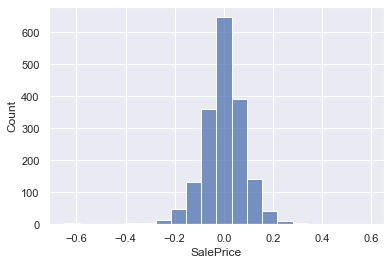

In [55]:
features = list(x_train.columns)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

gs = GridSearchCV(model, params, cv=cv_, return_train_score=True, refit=True)
gs.fit(x_train,y_train)
gs.best_params_
###################################    
    
print('best params: ',gs.best_params_)
print('score: ',gs.score(x_train,y_train))
print('  ')
print('test score: ',gs.score(x_test,y_test))


if linear_reg:
    adj_r2 = 1-(1-gs.score(x_train,y_train))*(x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)
    print('adj_r2: ', adj_r2)
    adj_r2_test = 1-(1-gs.score(x_test,y_test))*(x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
    print('  ')
    print('adj_r2_test: ',adj_r2_test)
    print(' ')


train_pred = gs.best_estimator_.predict(x_train)
print('train RMSE: ' + str(mean_squared_error(train_pred,y_train)**0.5))
print('  ')

test_pred = gs.best_estimator_.predict(x_test)
print('test RMSE: ' + str(mean_squared_error(test_pred,y_test)**0.5))

if linear_reg:

    coefs = pd.Series(gs.best_estimator_.coef_, name = 'coef' )

    varnames = pd.Series(features, name = 'features')

    pd.set_option('display.max_rows', None) # or 1000.

    abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

    coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)
    
    #return:
    model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)
    
    print(model_importances)
    print(' ')

# elif tree_based:
#     pd.set_option('display.max_rows', None) # or 1000.
    
    #return
#     model_importances = pd.Series(model.feature_importances_, index = features).sort_values(ascending=False)
    
#     print(model_importances)


if linear_reg:
    residuals = y_train - train_pred
    print('skewness: ',stats.skew(residuals))
    print(' ')
    sns.set_theme(style='darkgrid')
    sns.histplot(residuals, bins=20);

In [56]:
# random forest
model= RandomForestRegressor(n_estimators=100)
x_train = model_vars_data
x_test = test_vars_data
y_train = np.log(price_train.SalePrice)
y_test = np.log(price_test.SalePrice)
params = {'max_depth': range(1, 10)}
cv_ = 5
linear_reg = False
tree_based = True
#model_importances = 


# want to return the dataframe with the features


In [57]:
def regx(model= RandomForestRegressor(n_estimators=100),
x_train = model_vars_data,
x_test = test_vars_data,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {'max_depth': range(1, 10)},
cv_ = 5
linear_reg = False
tree_based = True) :
######################################

    features = list(x_train.columns)

    ss = StandardScaler()
    x_train = ss.fit_transform(x_train)
    x_test = ss.transform(x_test)

    gs = GridSearchCV(model, params, cv=cv_, return_train_score=True, refit=True)
    gs.fit(x_train,y_train)
    gs.best_params_

    model= gs.best_estimator_
    ###################################    

    print('best params: ',gs.best_params_)
    print('score: ',gs.score(x_train,y_train))
    print('  ')
    print('test score: ',gs.score(x_test,y_test))


    if linear_reg:
        adj_r2 = 1-(1-gs.score(x_train,y_train))*(x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)
        print('adj_r2: ', adj_r2)
        adj_r2_test = 1-(1-gs.score(x_test,y_test))*(x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
        print('  ')
        print('adj_r2_test: ',adj_r2_test)
        print(' ')


    train_pred = gs.best_estimator_.predict(x_train)
    print('train RMSE: ' + str(mean_squared_error(train_pred,y_train)**0.5))
    print('  ')

    test_pred = gs.best_estimator_.predict(x_test)
    print('test RMSE: ' + str(mean_squared_error(test_pred,y_test)**0.5))

    if linear_reg:

        coefs = pd.Series(gs.best_estimator_.coef_, name = 'coef' )

        varnames = pd.Series(features, name = 'features')

        pd.set_option('display.max_rows', None) # or 1000.

        abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

        coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)

        #return:
        model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)

        print(model_importances)
        print(' ')

    elif tree_based:
        pd.set_option('display.max_rows', None) # or 1000.

        #return
        model_importances = pd.Series(model.feature_importances_, index = features).sort_values(ascending=False)

        print(model_importances)


    if linear_reg:
        residuals = y_train - train_pred
        print('skewness: ',stats.skew(residuals))
        print(' ')
        sns.set_theme(style='darkgrid')
        sns.histplot(residuals, bins=20);

best params:  {'max_depth': 9}
score:  0.9701904920993591
  
test score:  0.46416437197872673
train RMSE: 0.06620539131131235
  
test RMSE: 0.28985413074090793
OverallQual              5.280065e-01
bc_GrLivArea             1.060553e-01
yeo_GarageArea           7.082832e-02
log_first_FlrSF          4.586032e-02
GarageCars               3.984639e-02
yeo_TotalBsmtSF          3.471713e-02
YearBuilt                2.136949e-02
CentralAir_Y             1.092061e-02
log_LotArea              9.822087e-03
FullBath                 9.006065e-03
log_BsmtFinSF1           8.929220e-03
BsmtFinSF1               8.830204e-03
OverallCond              8.152678e-03
YearRemodAdd             7.140300e-03
BsmtFinType1             6.115322e-03
BsmtQual                 4.682956e-03
KitchenQual              4.565059e-03
GarageType_Detchd        4.398732e-03
log_OpenPorchSF          3.887477e-03
FireplaceQu              3.861799e-03
MSSubClass               3.224785e-03
ExterQual                2.943671e-03
MSZo

# function

In [58]:
def regx(model= None,
x_train = None,
x_test = None,
y_train = None,
y_test = None,
params = None, #put dictionary of params
cv_ = 5,
linear_reg = True,
tree_based = False) :
######################################

    features = list(x_train.columns)

    ss = StandardScaler()
    x_train = ss.fit_transform(x_train)
    x_test = ss.transform(x_test)

    gs = GridSearchCV(model, params, cv=cv_, return_train_score=True, refit=True)
    gs.fit(x_train,y_train)
    gs.best_params_

    model= gs.best_estimator_
    ###################################    

    print('best params: ',gs.best_params_)
    print('score: ',gs.score(x_train,y_train))
    print('  ')
    print('test score: ',gs.score(x_test,y_test))


    if linear_reg:
        adj_r2 = 1-(1-gs.score(x_train,y_train))*(x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)
        print('adj_r2: ', adj_r2)
        adj_r2_test = 1-(1-gs.score(x_test,y_test))*(x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
        print('  ')
        print('adj_r2_test: ',adj_r2_test)
        print(' ')


    train_pred = gs.best_estimator_.predict(x_train)
    print('train RMSE: ' + str(mean_squared_error(train_pred,y_train)**0.5))
    print('  ')

    test_pred = gs.best_estimator_.predict(x_test)
    print('test RMSE: ' + str(mean_squared_error(test_pred,y_test)**0.5))

    if linear_reg:

        coefs = pd.Series(gs.best_estimator_.coef_, name = 'coef' )

        varnames = pd.Series(features, name = 'features')

        pd.set_option('display.max_rows', None) # or 1000.

        abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

        coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)

        #return:
        model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)

        print(model_importances)
        print(' ')

    elif tree_based:
        pd.set_option('display.max_rows', None) # or 1000.

        #return
        model_importances = pd.Series(model.feature_importances_, index = features).sort_values(ascending=False)

        print(model_importances)


    if linear_reg:
        residuals = y_train - train_pred
        print('skewness: ',stats.skew(residuals))
        print(' ')
        sns.set_theme(style='darkgrid')
        sns.histplot(residuals, bins=20);

best params:  {'alpha': 0.001}
score:  0.9461305290242696
  
test score:  -4.629224158618257
adj_r2:  0.9396434543071426
  
adj_r2_test:  -6.515354533008485
 
train RMSE: 0.08899944712705422
  
test RMSE: 0.9394809363978953
                  features      coef   abs_val
155           bc_GrLivArea  0.130452  0.130452
10             OverallQual  0.067822  0.067822
7                YearBuilt  0.057045  0.057045
144            OverallCond  0.047102  0.047102
30             log_LotArea  0.033560  0.033560
169             BsmtFinSF1  0.033526  0.033526
187   Neighborhood_Somerst  0.022420  0.022420
135        Condition1_Norm  0.020196  0.020196
166        Condition2_PosN -0.020046  0.020046
188             Functional  0.018617  0.018617
54              Fireplaces  0.017768  0.017768
0     Neighborhood_Crawfor  0.017313  0.017313
146   Neighborhood_NridgHt  0.015576  0.015576
52         yeo_TotalBsmtSF  0.015458  0.015458
71    Neighborhood_StoneBr  0.015254  0.015254
56          yeo_GarageAr

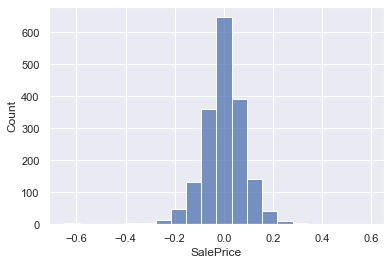

In [69]:
regx(model= Lasso(max_iter=3000),
x_train = model_vars_data,
x_test = test_vars_data,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False
#model_importances = 
    )

In [86]:
def regx2(model= None,
x_train = None,
x_test = None,
y_train = None,
y_test = None,
params = None, #put dictionary of params
cv_ = 5,
linear_reg = True,
tree_based = False) :
######################################
#########################################

    features = list(x_train.columns)

    ss = StandardScaler()
    x_train = ss.fit_transform(x_train)
    x_test = ss.transform(x_test)

    gs = GridSearchCV(model, params, cv=cv_, return_train_score=True, refit=True)
    gs.fit(x_train,y_train)
    gs.best_params_

    model= gs.best_estimator_
    ###################################    

    print('best params: ',gs.best_params_)
    print('score: ',gs.score(x_train,y_train))
    print('  ')
    print('test score: ',gs.score(x_test,y_test))


    if linear_reg:
        adj_r2 = 1-(1-gs.score(x_train,y_train))*(x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)
        print('adj_r2: ', adj_r2)
        adj_r2_test = 1-(1-gs.score(x_test,y_test))*(x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
        print('  ')
        print('adj_r2_test: ',adj_r2_test)
        print(' ')


    train_pred = gs.best_estimator_.predict(x_train)
    print('train RMSE: ' + str(mean_squared_error(train_pred,y_train)**0.5))
    print('  ')

    test_pred = gs.best_estimator_.predict(x_test)
    print('test RMSE: ' + str(mean_squared_error(test_pred,y_test)**0.5))

    if linear_reg:

        coefs = pd.Series(gs.best_estimator_.coef_, name = 'coef' )

        varnames = pd.Series(features, name = 'features')

        pd.set_option('display.max_rows', None) # or 1000.

        abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

        coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)

        #return:
        model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)

        print(model_importances)
        print(' ')

    elif tree_based:
        pd.set_option('display.max_rows', None) # or 1000.

        #return
        varnames = pd.Series(features, name = 'features')

        importances_ = pd.Series(model.feature_importances_, name = 'importances')

        df = pd.concat([varnames,importances_], axis=1)

        model_importances = df.sort_values(by=['importances'], ascending=False)



    #         model_importances = pd.Series(model.feature_importances_, index = features).sort_values(ascending=False)

        print(model_importances)


    if linear_reg:
        residuals = y_train - train_pred
        print('skewness: ',stats.skew(residuals))
        print(' ')
        sns.set_theme(style='darkgrid')
        sns.histplot(residuals, bins=20);
    
    print('model_importances.shape: ',model_importances.shape)
    return model_importances

best params:  {'alpha': 0.001}
score:  0.9461305290242696
  
test score:  -4.629224158618257
adj_r2:  0.9396434543071426
  
adj_r2_test:  -6.515354533008485
 
train RMSE: 0.08899944712705422
  
test RMSE: 0.9394809363978953
                  features      coef   abs_val
155           bc_GrLivArea  0.130452  0.130452
10             OverallQual  0.067822  0.067822
7                YearBuilt  0.057045  0.057045
144            OverallCond  0.047102  0.047102
30             log_LotArea  0.033560  0.033560
169             BsmtFinSF1  0.033526  0.033526
187   Neighborhood_Somerst  0.022420  0.022420
135        Condition1_Norm  0.020196  0.020196
166        Condition2_PosN -0.020046  0.020046
188             Functional  0.018617  0.018617
54              Fireplaces  0.017768  0.017768
0     Neighborhood_Crawfor  0.017313  0.017313
146   Neighborhood_NridgHt  0.015576  0.015576
52         yeo_TotalBsmtSF  0.015458  0.015458
71    Neighborhood_StoneBr  0.015254  0.015254
56          yeo_GarageAr

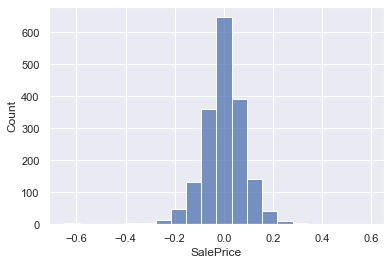

In [87]:
test_it = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data,
x_test = test_vars_data,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [85]:
print(test_it)

                  features      coef   abs_val
155           bc_GrLivArea  0.130452  0.130452
10             OverallQual  0.067822  0.067822
7                YearBuilt  0.057045  0.057045
144            OverallCond  0.047102  0.047102
30             log_LotArea  0.033560  0.033560
169             BsmtFinSF1  0.033526  0.033526
187   Neighborhood_Somerst  0.022420  0.022420
135        Condition1_Norm  0.020196  0.020196
166        Condition2_PosN -0.020046  0.020046
188             Functional  0.018617  0.018617
54              Fireplaces  0.017768  0.017768
0     Neighborhood_Crawfor  0.017313  0.017313
146   Neighborhood_NridgHt  0.015576  0.015576
52         yeo_TotalBsmtSF  0.015458  0.015458
71    Neighborhood_StoneBr  0.015254  0.015254
56          yeo_GarageArea  0.015177  0.015177
95     Exterior1st_BrkFace  0.015070  0.015070
160   Neighborhood_GrnHill  0.015052  0.015052
37              GarageCars  0.014032  0.014032
82             KitchenQual  0.013790  0.013790
99           

In [72]:
# random forest
test_it = regx2(
model= RandomForestRegressor(n_estimators=100),
x_train = model_vars_data,
x_test = test_vars_data,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {'max_depth': range(1, 10)},
cv_ = 5,
linear_reg = False,
tree_based = True
)

best params:  {'max_depth': 9}
score:  0.9709933219185102
  
test score:  0.43116282100589587
train RMSE: 0.06530778450610703
  
test RMSE: 0.2986466775356008
                  features   importances
10             OverallQual  5.262105e-01
155           bc_GrLivArea  1.124180e-01
56          yeo_GarageArea  6.533015e-02
63         log_first_FlrSF  4.416057e-02
37              GarageCars  3.769813e-02
52         yeo_TotalBsmtSF  3.713114e-02
7                YearBuilt  2.303375e-02
21            CentralAir_Y  1.389128e-02
169             BsmtFinSF1  1.055714e-02
30             log_LotArea  1.054110e-02
144            OverallCond  9.950290e-03
31          log_BsmtFinSF1  9.252845e-03
1             YearRemodAdd  8.758097e-03
70                FullBath  6.843840e-03
45            BsmtFinType1  5.271787e-03
82             KitchenQual  4.909222e-03
68             FireplaceQu  3.421063e-03
49         log_OpenPorchSF  3.180612e-03
143              ExterQual  3.083658e-03
148             MSSub

In [75]:
regx(model= Lasso(max_iter=3000)
x_train = model_vars_data
x_test = test_vars_data
y_train = np.log(price_train.SalePrice)
y_test = np.log(price_test.SalePrice)
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
cv_ = 5
linear_reg = True
tree_based = False

SyntaxError: invalid syntax (Temp/ipykernel_17868/3155762755.py, line 2)

In [73]:
features = list(x_train.columns)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

gs = GridSearchCV(model, params, cv=cv_, return_train_score=True, refit=True)
gs.fit(x_train,y_train)
gs.best_params_

model= gs.best_estimator_
###################################    

print('best params: ',gs.best_params_)
print('score: ',gs.score(x_train,y_train))
print('  ')
print('test score: ',gs.score(x_test,y_test))


if linear_reg:
    adj_r2 = 1-(1-gs.score(x_train,y_train))*(x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)
    print('adj_r2: ', adj_r2)
    adj_r2_test = 1-(1-gs.score(x_test,y_test))*(x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
    print('  ')
    print('adj_r2_test: ',adj_r2_test)
    print(' ')


train_pred = gs.best_estimator_.predict(x_train)
print('train RMSE: ' + str(mean_squared_error(train_pred,y_train)**0.5))
print('  ')

test_pred = gs.best_estimator_.predict(x_test)
print('test RMSE: ' + str(mean_squared_error(test_pred,y_test)**0.5))

if linear_reg:

    coefs = pd.Series(gs.best_estimator_.coef_, name = 'coef' )

    varnames = pd.Series(features, name = 'features')

    pd.set_option('display.max_rows', None) # or 1000.

    abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

    coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)

    #return:
    model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)

    print(model_importances)
    print(' ')

elif tree_based:
    pd.set_option('display.max_rows', None) # or 1000.

    #return
    varnames = pd.Series(features, name = 'features')

    importances_ = pd.Series(model.feature_importances_, name = 'importances')

    df = pd.concat([varnames,importances_], axis=1)

    model_importances = df.sort_values(by=['importances'], ascending=False)



#         model_importances = pd.Series(model.feature_importances_, index = features).sort_values(ascending=False)

    print(model_importances)


if linear_reg:
    residuals = y_train - train_pred
    print('skewness: ',stats.skew(residuals))
    print(' ')
    sns.set_theme(style='darkgrid')
    sns.histplot(residuals, bins=20);



In [68]:
# def regx3(model= None,
# x_train = None,
# x_test = None,
# y_train = None,
# y_test = None,
# params = None, #put dictionary of params
# cv_ = 5,
# linear_reg = True,
# tree_based = False) :
######################################
regx(model= Lasso(max_iter=3000)
x_train = model_vars_data
x_test = test_vars_data
y_train = np.log(price_train.SalePrice)
y_test = np.log(price_test.SalePrice)
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
cv_ = 5
linear_reg = True
tree_based = False
######################################

features = list(x_train.columns)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

gs = GridSearchCV(model, params, cv=cv_, return_train_score=True, refit=True)
gs.fit(x_train,y_train)
gs.best_params_

model= gs.best_estimator_
###################################

mdl_dict = {}

mdl_dict['best params'] = gs.best_params_
mdl_dict['score'] = gs.score(x_train,y_train)
mdl_dict['test score'] = gs.score(x_test,y_test)

print('best params: ',gs.best_params_)
print('score: ',gs.score(x_train,y_train))
print('  ')
print('test score: ',gs.score(x_test,y_test))


if linear_reg:
    adj_r2 = 1-(1-gs.score(x_train,y_train))*(x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)
    print('adj_r2: ', adj_r2)
    adj_r2_test = 1-(1-gs.score(x_test,y_test))*(x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
    print('  ')
    print('adj_r2_test: ',adj_r2_test)
    print(' ')

    mdl_dict['adj_r2'] = adj_r2
    mdl_dict['adj_r2_test'] = adj_r2_test


train_pred = gs.best_estimator_.predict(x_train)
print('train RMSE: ' + str(mean_squared_error(train_pred,y_train)**0.5))
print('  ')
mdl_dict['train RMSE'] = str(mean_squared_error(train_pred,y_train)**0.5)

test_pred = gs.best_estimator_.predict(x_test)
print('test RMSE: ' + str(mean_squared_error(test_pred,y_test)**0.5)

#     mdl_dict['test RMSE'] = str(mean_squared_error(test_pred,y_test)**0.5)

if linear_reg:

    coefs = pd.Series(gs.best_estimator_.coef_, name = 'coef' )

    varnames = pd.Series(features, name = 'features')

    pd.set_option('display.max_rows', None) # or 1000.

    abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

    coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)

    #return:
    model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)

    print(model_importances)
    print(' ')
    mdl_dict['model_importances'] = model_importances

elif tree_based:
    pd.set_option('display.max_rows', None) # or 1000.

    #return
    varnames = pd.Series(features, name = 'features')

    importances_ = pd.Series(model.feature_importances_, name = 'importances')

    df = pd.concat([varnames,importances_], axis=1)

    model_importances = df.sort_values(by=['importances'], ascending=False)

    mdl_dict['model_importances'] = model_importances

    print(model_importances)


if linear_reg:
    residuals = y_train - train_pred
    print('skewness: ',stats.skew(residuals))
    mdl_dict['skewness'] = stats.skew(residuals)
    print(' ')
    sns.set_theme(style='darkgrid')
    sns.histplot(residuals, bins=20);

return mdl_dict

SyntaxError: invalid syntax (Temp/ipykernel_17868/3699114618.py, line 12)